In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Use in-memory DB to avoid file errors
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE product_sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    category TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT
)
""")

# Insert sample data
new_data = [
    ("Laptop", "Electronics", 8, 850.00, "2025-01-03"),
    ("Milk", "Grocery", 40, 1.00, "2025-01-10"),
    ("TV", "Electronics", 3, 600.00, "2025-02-11"),
    ("Bread", "Grocery", 50, 1.20, "2025-02-20"),
]

cursor.executemany("""
INSERT INTO product_sales (product, category, quantity, price, date)
VALUES (?, ?, ?, ?, ?)
""", new_data)
conn.commit()

# Query and plot
df = pd.read_sql_query("""
SELECT category, strftime('%Y-%m', date) AS month,
       SUM(quantity) AS total_quantity,
       ROUND(SUM(quantity * price), 2) AS total_revenue
FROM product_sales
GROUP BY category, month
ORDER BY month, category
""", conn)

print(df)


      category    month  total_quantity  total_revenue
0  Electronics  2025-01               8         6800.0
1      Grocery  2025-01              40           40.0
2  Electronics  2025-02               3         1800.0
3      Grocery  2025-02              50           60.0


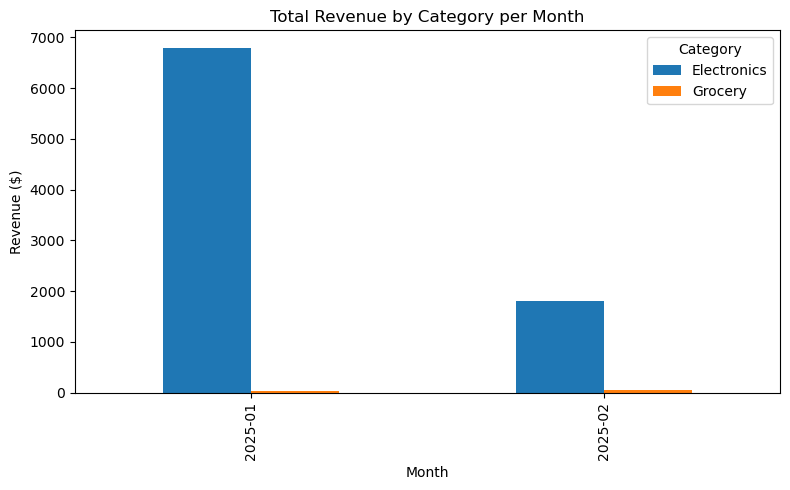

In [2]:
# Step 5: Plot the sales revenue by category per month
pivot_df = df.pivot(index='month', columns='category', values='total_revenue')
pivot_df.plot(kind='bar', figsize=(8,5))
plt.title("Total Revenue by Category per Month")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.legend(title='Category')
plt.tight_layout()
plt.savefig("new_sales_chart.png")
plt.show()
